In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Задача

Наша задача --- проаналізувати, як залежить ціна на будинок $h$ залежно від площі $x_1$, кількості ванних кімнат $x_2$ та кількості спалень $x_2$.

Якщо у вас є набір даних з $m$ вибірок, кожна з яких називається $x^{(i)}$ ($n$-вимірний вектор), і вектор результатів $ Y $ ($m$-вимірний вектор), можна побудувати наступні матриці:

1. Матриця ознак

$$ \mathbf{X} = 
\begin{pmatrix}
\vec{x}^{(1)} \\
\vec{x}^{(2)} \\
\vdots\\
\vec{x}^{(m)} \\
\end{pmatrix} =

\begin{pmatrix}
x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)}\\
x_1^{(2)} & x_2^{(2)} & \ldots & x_n^{(2)}\\
\vdots    & \vdots    &  \ddots & \vdots \\
x_1^{(n)} & x_2^{(n)} & \ldots & x_n^{(n)}\\
\end{pmatrix}
$$

2. Вектор результатів

$$
\vec{Y} = 
\begin{pmatrix}
\vec{y}^{(1)} \\
\vec{y}^{(2)} \\
\vdots\\
\vec{y}^{(m)} \\
\end{pmatrix}
$$

3. Вектор вагових коефіцієнтів

$$
\vec{w} = 
\begin{pmatrix}
\vec{w}^{(1)} \\
\vec{w}^{(2)} \\
\vdots\\
\vec{w}^{(m)} \\
\end{pmatrix}
$$

Якщо у вас є набір даних з $m$ вибірок, кожна з яких називається $x^{(i)}$ ($n$-вимірний вектор), і вектор результатів $ Y $ ($m$-вимірний вектор), можна побудувати наступні матриці:

1. Матриця ознак

$$ \mathbf{X} = 
\begin{pmatrix}
\vec{x}^{(1)} \\
\vec{x}^{(2)} \\
\vdots\\
\vec{x}^{(m)} \\
\end{pmatrix} =

\begin{pmatrix}
x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)}\\
x_1^{(2)} & x_2^{(2)} & \ldots & x_n^{(2)}\\
\vdots    & \vdots    &  \ddots & \vdots \\
x_1^{(n)} & x_2^{(n)} & \ldots & x_n^{(n)}\\
\end{pmatrix}
$$

2. Вектор результатів

$$
\vec{Y} = 
\begin{pmatrix}
\vec{y}^{(1)} \\
\vec{y}^{(2)} \\
\vdots\\
\vec{y}^{(m)} \\
\end{pmatrix}
$$

3. Вектор вагових коефіцієнтів

$$
\vec{w} = 
\begin{pmatrix}
\vec{w}^{(1)} \\
\vec{w}^{(2)} \\
\vdots\\
\vec{w}^{(m)} \\
\end{pmatrix}
$$

# "Self-made" реалізація алгоритму

## Функція гіпотези

Функція має вигляд:

$$ \vec{h}(\vec{w}, X) = X \vec{w}, $$
де  $ \vec{w} $ --- вектор вагових коефіцієнтів, $ X $ --- вектор-стовпець векторів ознак (матриця ознак).

Якщо на вхід подамо конкретний вектор ознак:
$$
\vec{x} = 
\begin{pmatrix}
{x}^{(1)} \\
{x}^{(2)} \\
\vdots\\
{x}^{(m)} \\
\end{pmatrix}
$$

то завдяки функції гіпотизи отримаємо передбачувану (predict) ціну на квартиру.

In [108]:
def h(W, X):
    """
    Calculate the hypothesis for linear regression.

    Parameters:
    W (numpy.ndarray): Weight vector (dimension: (n+1,)).
    X (numpy.ndarray): Feature matrix (dimension: (m, n+1)).

    Returns:
    hypothesis (numpy.ndarray): Hypothesis values (dimension: (m,)).
    """
    hypothesis = X @ W
    return hypothesis

## Функція втрат лінійної регресії

Функція має вигляд:

$$ J(\vec{w}) = \frac1{2m} \left( \vec{h}(\vec{w}, \mathbf{X}) - \vec{Y} \right)^2 $$

In [109]:
def J(W, X, Y):
    """
    Calculate the mean squared error (MSE) for linear regression.

    Parameters:
    W (numpy.ndarray): Weight vector (dimension: (n+1,)).
    X (numpy.ndarray): Feature matrix (dimension: (m, n+1)).
    Y (numpy.ndarray): Target vector (dimension: (m,)).

    Returns:
    mse (float): Mean squared error.
    """
    m = len(X)   
    error = h(W, X) - Y
    return 1 / ( 2 * m ) * error @ error

## Вектор-градієнт функції втрат 

Вектор-градієнт функції втрат  має вигляд:

$$ \vec{\nabla} J = \frac1{m} \mathbf{X}^{\mathrm{T}} \cdot (\mathrm{X}\vec{w} - \vec{Y} )  = \frac1{m} \mathbf{X}^{\mathrm{T}} \cdot (\vec{h} - \vec{Y} ) $$

In [110]:
def nabla_J(W, X, Y):
    """
    Computes the gradient of the loss function for linear regression.

    Parameters:
    W (numpy.ndarray): Vector of weights (dimensionality (n+1,)).
    X (numpy.ndarray): Feature matrix (dimensionality (m, n+1)).
    Y (numpy.ndarray): Target value vector (dimensionality (m,)).

    Returns:
    Gradient (numpy.ndarray): The gradient of the loss function (dimension (n+1,)).
    """
    m = len(X)
    gradient = (1 / m) * (X.T) @ (h(W, X) - Y)
    return gradient

## Реалізація градієнтного спуску

Формула для обчислення градієнтного спуску (одна ітерація) має вигляд:

$$ \vec{w} = \vec{w}_{\text{prev}} - \alpha \vec{\nabla} J $$

In [111]:
def gradient_descent(X, Y, 
                     W=np.zeros(3,), 
                     alpha=1e-5, 
                     iters=int(3e2),
                     epsilon = 1e-1
                     ):

    """
    Perform gradient descent optimization for linear regression.

    Parameters:
    X (numpy.ndarray): Feature matrix (dimension: (m, n+1)).
    Y (numpy.ndarray): Target vector (dimension: (m,)).
    W (numpy.ndarray, optional): Initial weight vector (dimension: (n+1,)). Defaults to [1., 1., 1.].
    alpha (float, optional): Learning rate. Defaults to 0.1.
    iters (int, optional): Number of iterations. Defaults to 1.

    Returns:
    W (numpy.ndarray): Optimized weight vector (dimension: (n+1,)).
    """

    J_0 = J(W, X, Y)
    
    for _ in range(iters):
        W -= alpha * nabla_J(W, X, Y)
        J_1 = J(W, X, Y)
        
        if np.abs(J_1 - J_0) < epsilon:
            print("The model converges")
            break
        elif J_1 >= J_0:
            print("The model does not converges")
            break
        # else:       
        #     print(np.abs(J_1 - J_0), np.abs(J_1 - J_0) < epsilon)
        
        J_0 = J_1 
        
        
    return W


# Завантаження даних

In [112]:
df = pd.read_csv('Housing.csv')
X = df[['area', 'bedrooms', 'bathrooms']].to_numpy()
Y = df.price.to_numpy()

## Нормалізація даних

In [113]:
X_normalize = (X - np.mean(X))/(np.max(X) - np.min(X))

# Перевірка "Self-made" алгоритмів

In [114]:
gradient_descent(X_normalize, Y)

array([ 3431.71753232, -1513.97593758, -1515.46148823])

# Аналітичне значення для вектора $\vec{w}$

Аналітичний вираз для вектора вагори

In [115]:
analitical_W = np.linalg.pinv(X.T @ X) @ X.T @ Y
analitical_W

array([3.72448352e+02, 3.68974672e+05, 1.37031315e+06])

# Алгоритми бібліотеки `sklearn.linear_model`

In [152]:
regressor = LinearRegression().fit(X, Y)
regressor.coef_
h_sk = regressor.predict(X)


# Візуалізація

In [150]:
mean_squared_error(Y, h_sk)

1791170049977.319

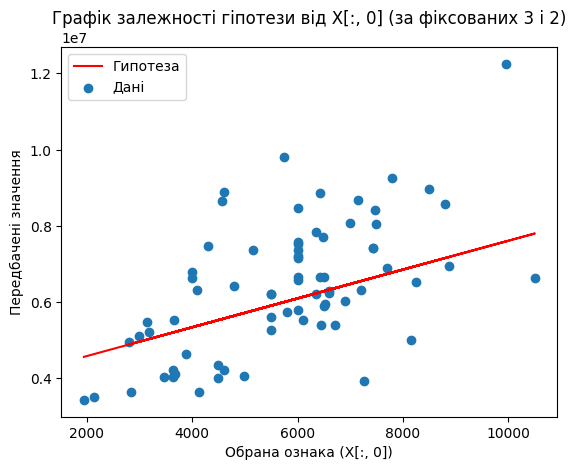

In [151]:
fixed_feature_1 = X[2, 1]  # Фіксуємо значення X[:, 1]
fixed_feature_2 = X[2, 2]  # Фіксуємо значення X[:, 2]

# Створимо маску для фільтрації даних з урахуванням фіксованих значень
mask = (X[:, 1] == fixed_feature_1) & (X[:, 2] == fixed_feature_2)

# Обираємо відповідні значення для фіксованих ознак і передбачені значення
selected_feature = X[mask][:, 0]
h_sk_selected = h_sk[mask]
Y_selected = Y[mask]

# Побудуйте графік залежності гіпотези від обраної ознаки за фіксованих значень інших ознак
plt.plot(selected_feature, h_sk_selected, label="Гипотеза", color='red')
plt.scatter(selected_feature, Y_selected, label="Дані")
plt.xlabel("Обрана ознака (X[:, 0])")
plt.ylabel("Передбачені значення")
plt.title(f"Графік залежності гіпотези від X[:, 0] (за фіксованих {fixed_feature_1} і {fixed_feature_2})")
plt.legend()
plt.show()
